In [1]:
import cv2
import numpy as np
# import sys
# import time
# import imutils
import matplotlib.pyplot as plt

In [48]:
inputImage = cv2.imread("qrcode-learnopencv.jpg")


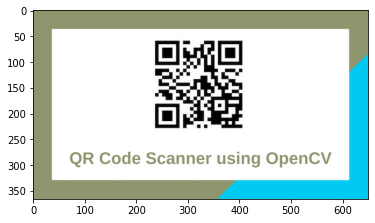

In [67]:
plt.imshow(inputImage)

In [55]:
class QRdecoder():
    def __init__(self):
        self.qrDecoder = cv2.QRCodeDetector()
        
    def centroidnp(arr):
            length = arr.shape[0]
            sum_x = sum(arr[:, 0])
            sum_y = sum(arr[:, 1])
            return int(sum_x/length), int(sum_y/length)
        
    def detect(self,img):
        # Detect and decode the qrcode
        data,bbox,rectifiedImage = self.qrDecoder.detectAndDecode(img)
        if len(data)>0:
            print("Decoded Data : {}".format(data))
            bbox = bbox.reshape(-1,2)
            bbox = np.uint8(bbox)
            for i, pt in enumerate(bbox):
                qr_img = cv2.line(img, tuple(pt), tuple(bbox[i-1]), (255,0,0), 5)
            center = centroidnp(bbox)
            qr_img = cv2.circle(qr_img, center, 1,(0,255,0), 5)
            return qr_img, center, data
        else:
            return img, None, None

In [57]:
qrdecoder = QRdecoder()
qr_img, center, data = qrdecoder.detect(inputImage)

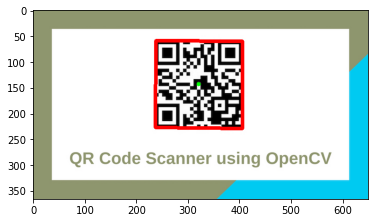

In [58]:
plt.imshow(qr_img)

In [12]:
inputImage.shape

(366, 650, 3)